<a href="https://colab.research.google.com/github/vysf/stacking-chart-for-electrical-resistivity-method/blob/master/wenner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
def wenner(x1,x2,a):
  elektroda = np.arange(x1,x2+1,a)
  A, M, N, B = [], [], [], []
  X, Y = [], []
  n = 0
  while True:
    n += 1
    for i in range(len(elektroda)):
      num = i+(3*n)
      if num >= len(elektroda):
        break
      A.append(elektroda[i])
      M.append(elektroda[i+(1*n)])
      N.append(elektroda[i+(2*n)])
      B.append(elektroda[i+(3*n)])
      X.append(M[-1]+(N[-1] - M[-1])/2)
      Y.append(n)
    if i == 0:
      break
  return np.array(A),np.array(M),np.array(N),np.array(B),np.array(X), np.array(Y), elektroda

x1 = 0
x2 = 62
a = 2
A,M,N,B,X,Y,elektroda = wenner(x1,x2,a)


In [ ]:
d = {'A': A, 'M': M, 'N': N, 'B': B, 'X': X, 'Y': Y}
df = pd.DataFrame(data=d)
# get XY where A == x1
# get XY where B == x2
first = df[df['A'] == x1]
last = df[df['B'] == x2]
df

,A,M,N,B,X,Y
0,0,2,4,6,3.0,1
1,2,4,6,8,5.0,1
2,4,6,8,10,7.0,1
3,6,8,10,12,9.0,1
4,8,10,12,14,11.0,1
...,...,...,...,...,...,...
150,4,22,40,58,31.0,9
151,6,24,42,60,33.0,9
152,8,26,44,62,35.0,9
153,0,20,40,60,30.0,10


In [ ]:
df.to_excel("wenner alpha.xlsx")

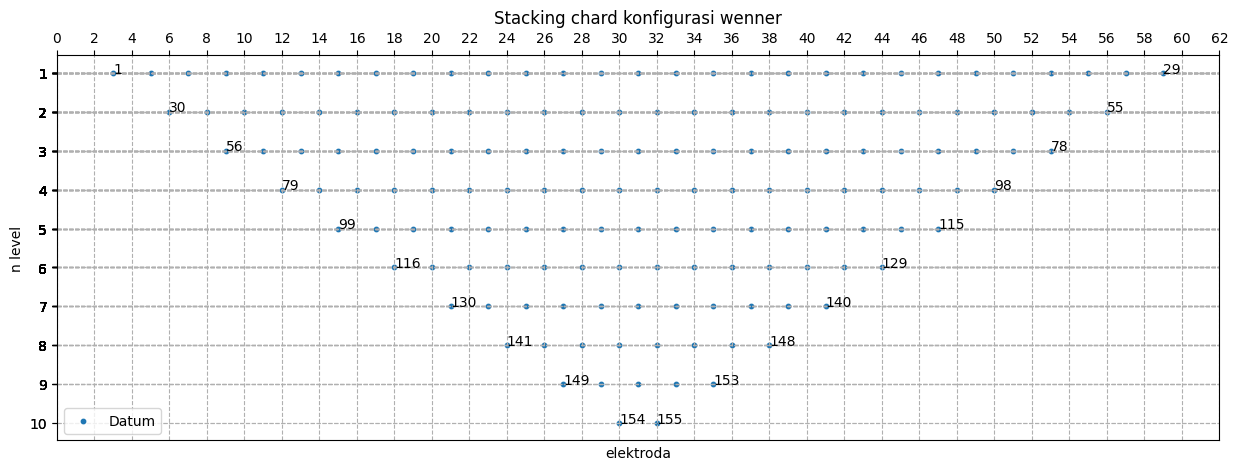

In [ ]:
# coordinates = [(f'{X+1}',1,2), ('b',3,4), ('c',5,6)]
plt.figure(figsize=(15,5))
plt.scatter(X, Y, label='Datum', s=10)

for txt, x, y in zip(first.index, first['X'].values, first['Y'].values):
  plt.annotate(f'{txt+1}', (x, y))
for txt, x, y in zip(last.index, last['X'].values, last['Y'].values):
  plt.annotate(f'{txt+1}', (x, y))
plt.title('Stacking chard konfigurasi wenner')
plt.xlabel('elektroda')
plt.ylabel('n level')
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(elektroda)
plt.yticks(Y)
plt.grid(linestyle='--')
plt.legend()